# World Happiness 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['figure.figsize'] = (7.0,7.0)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-happiness-report-2019/world-happiness-report-2019.csv


## Reading The Data

In [2]:
data_happy = pd.read_csv('/kaggle/input/world-happiness-report-2019/world-happiness-report-2019.csv')
data_happy.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
data_happy.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

## Renaming the columns

In [4]:
data_happy.columns = ['country', 'L', 'SD', 'Positive_affect', 'Negative_affect','Social_support',
                      'Freedom','Corruption','Generosity','GDP', 'Healthy_life_expectancy']

In [5]:
data_happy.head()

,country,L,SD,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,GDP,Healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [6]:
#describing the data
data_happy.describe()

,L,SD,Positive_affect,Negative_affect,Social_support,Freedom,Corruption,Generosity,GDP,Healthy_life_expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


## Handling the missing values and null values


In [7]:
data_happy.isnull().sum()

country                    0
L                          0
SD                         0
Positive_affect            1
Negative_affect            1
Social_support             1
Freedom                    1
Corruption                 8
Generosity                 1
GDP                        4
Healthy_life_expectancy    6
dtype: int64

In [8]:
#droping the rows with null values
data_happy = data_happy.dropna(0)

In [9]:
data_happy.isnull().sum()

country                    0
L                          0
SD                         0
Positive_affect            0
Negative_affect            0
Social_support             0
Freedom                    0
Corruption                 0
Generosity                 0
GDP                        0
Healthy_life_expectancy    0
dtype: int64

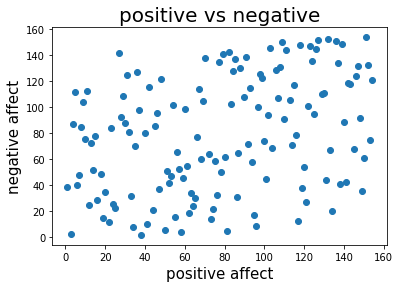

In [10]:
# scatter plot to visualize the relation between positive_affect and negative_affect
plt.scatter(data_happy['Positive_affect'],data_happy['Negative_affect'])
plt.xlabel('positive affect', fontsize=15)
plt.ylabel('negative affect', fontsize=15)
plt.title('positive vs negative', fontsize=20)
plt.show()

## Plotting bar graphs of Positive_affect and Negative_affect Countrywise

In [11]:
df1 = data_happy.groupby('country').agg({'Positive_affect':'sum'}).sort_values(by='Positive_affect', ascending = False)
df1 =df1.head(10)

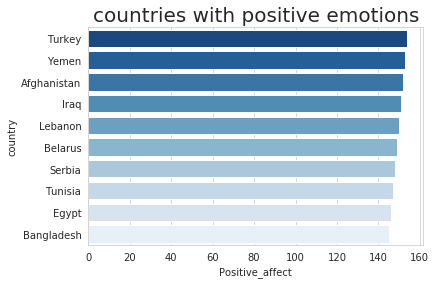

In [12]:
sb.set_style('whitegrid')
sb.barplot(y = df1.index,x = df1['Positive_affect'], palette = 'Blues_r')
plt.title('countries with positive emotions', fontsize = 20)
plt.show()

In [13]:
df2 = data_happy.groupby('country').agg({'Negative_affect':'sum'}).sort_values(by='Negative_affect', ascending = False)
df2 = df2.head(10)

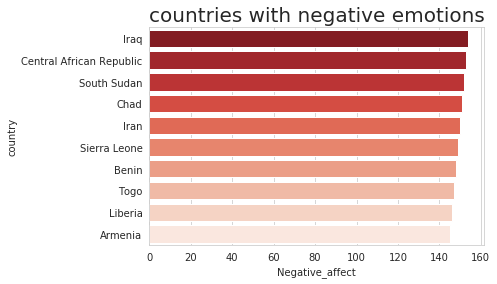

In [14]:
sb.set_style('whitegrid')
sb.barplot(y = df2.index,x = df2['Negative_affect'], palette = 'Reds_r')
plt.title('countries with negative emotions', fontsize = 20)
plt.show()

## Plotting scatter with respect to healthy life expenctancy

correlation coefficeint: 0.8266774854552914


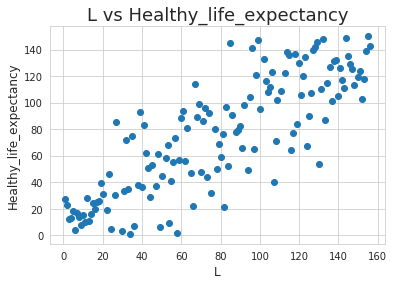

In [15]:
plt.scatter(data_happy['L'],data_happy['Healthy_life_expectancy'])
plt.xlabel('L',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('L vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['L'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.7552920223128851


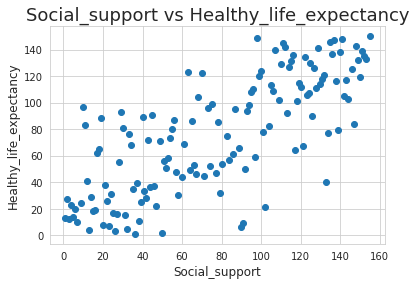

In [16]:
plt.scatter(data_happy['Social_support'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Social_support',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('Social_support vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Social_support'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.42394885936497795


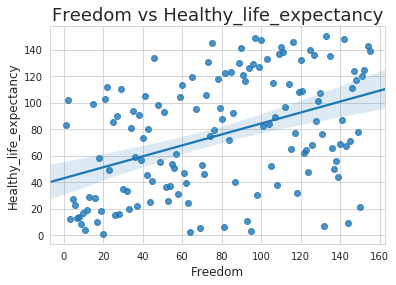

In [17]:
sb.regplot(data_happy['Freedom'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Freedom',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('Freedom vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Freedom'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.1489733996925131


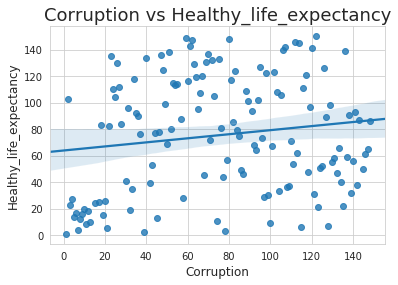

In [18]:
sb.regplot(data_happy['Corruption'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Corruption',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('Corruption vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Corruption'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.4531353972826464


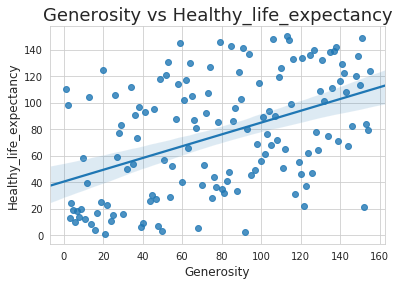

In [19]:
sb.regplot(data_happy['Generosity'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Generosity',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('Generosity vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Generosity'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

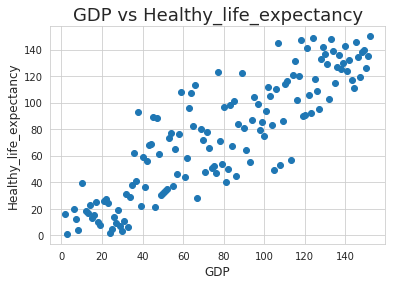

In [20]:
plt.scatter(data_happy['GDP'],data_happy['Healthy_life_expectancy'])
plt.xlabel('GDP',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('GDP vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['GDP'],data_happy['Healthy_life_expectancy'])[0,1]

correlation coefficeint: 0.3390323393750944


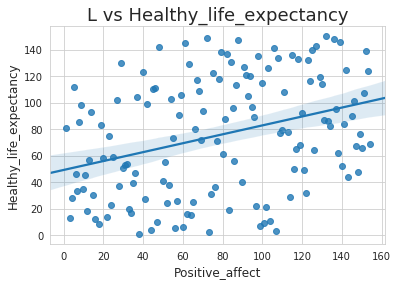

In [21]:
sb.regplot(data_happy['Positive_affect'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Positive_affect',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('L vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Positive_affect'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.5071477304649069


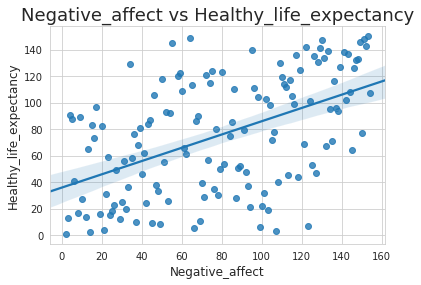

In [22]:
sb.regplot(data_happy['Negative_affect'],data_happy['Healthy_life_expectancy'])
plt.xlabel('Negative_affect',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('Negative_affect vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['Negative_affect'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

correlation coefficeint: 0.6375542027607524


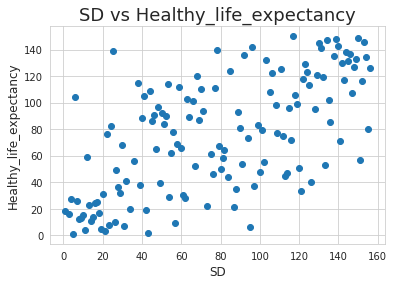

In [23]:
plt.scatter(data_happy['SD'],data_happy['Healthy_life_expectancy'])
plt.xlabel('SD',fontsize = 12)
plt.ylabel('Healthy_life_expectancy',fontsize = 12)
plt.title('SD vs Healthy_life_expectancy', fontsize = 18)

corr = np.corrcoef(data_happy['SD'],data_happy['Healthy_life_expectancy'])[0,1]
print("correlation coefficeint:",corr)

## Test Train data spliting
1. **dropping unnecessary column data**

In [24]:
from sklearn.model_selection import train_test_split
x = data_happy.drop(['country', 'Healthy_life_expectancy', 'SD'], axis=1)
y = data_happy['Healthy_life_expectancy']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = None)

## fitting the data in RandomForest Regression model

In [26]:
#importing random forest regression package
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(x_train, y_train)
y_pred = random.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**R2 value**

In [27]:
print('accuraccy of linear regression on taining set:{:.2f}'.format(random.score(x_train,y_train)))
print('accuraccy of  linear regression on testing set:{:.2f}'.format(random.score(x_test,y_test)))

accuraccy of linear regression on taining set:0.96
accuraccy of  linear regression on testing set:0.72


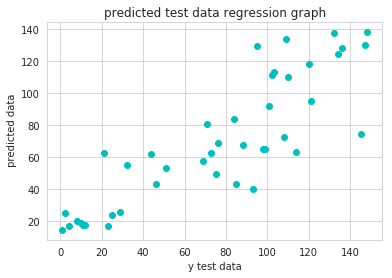

In [28]:
plt.scatter(y_test,y_pred,color='c')
plt.xlabel('y test data')
plt.ylabel(' predicted data')
plt.title('predicted test data regression graph')
plt.show()